# <center> <span style="color: #ec008a; font-family: EB Garamond"> <b> FDC 104: Programming for Scientific Computing and Data Analysis <br><br> Final project: Bike Sharing Demand

# <span style="color: #ec008a; font-family: EB Garamond"> Data Description

Hiện nay, dịch vụ cho thuê xe đạp đã xuất hiện ở nhiều thành phố đô thị nhằm nâng cao sự thuận tiện trong việc di chuyển. Tuy nhiên cần phải cung cấp dịch vụ cho cộng đồng vào thời điểm phù hợp để giảm thiểu thời gian chờ đợi. Cuối cùng, việc đảm bảo nguồn cung xe đạp cho thuê ổn định cho thành phố trở thành một mối quan tâm chính. Để làm được điều này, cần có khả năng dự đoán số lượng xe đạp cần thiết mỗi giờ.
Bộ dữ liệu chứa thông tin liên quan đến thời tiết (Nhiệt độ, Độ ẩm, Tốc độ gió, Tầm nhìn, Điểm sương, Bức xạ mặt trời, Lượng tuyết rơi, Lượng mưa), số lượng xe đạp được thuê mỗi giờ và thông tin ngày tháng.

📌Attribute Information:

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour (output attribute)
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc (Non Functional Hours), Fun (Functional hours)

📌Nhiệm vụ: Tạo mô hình dự báo số lượng xe đạp được thuê

# <span style="color: #ec008a; font-family: EB Garamond"> Table of Content

Part 1. Data cleaning
<br>
Part 2. Exploratory Data Analysis
<br>
Part 3. Model Development
<br>
Part 4. Model Comparison
<br>
Part 5. Conclusion

# <span style="color: #ec008a; font-family: EB Garamond"> Part 1: Data Cleaning

## 1.1. Importing data

In [101]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [102]:
url = "Bike_sharing_data.csv"
columns = ['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day']
df = pd.read_csv(url, encoding='latin-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Các kiểu dữ liệu cho từng biến

In [103]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [104]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Sau khi chạy phương thức isnull, nhóm nhận thấy dữ liệu không chứa dữ liệu NULL.

## 1.2. Formating data

In [105]:
bike_sharing = df.copy()

Nhóm chuyển định dạng của Date theo format: Năm-Tháng-Ngày

In [106]:
#Đổi định dạng Date 
bike_sharing['Date'] = pd.to_datetime(bike_sharing['Date'], format="%d/%m/%Y")
bike_sharing

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Nhóm thực hiện chuyển các biến categorical về các biến numeric bằng cách sử dụng phương thức getdummies

In [107]:
#Tạo biến giả cho các cột có dữ liệu kiểu object
dummy_variable_1 = pd.get_dummies(bike_sharing['Seasons'])
dummy_variable_1 = dummy_variable_1.astype(int)
bike_sharing = pd.concat([bike_sharing, dummy_variable_1], axis=1)
bike_sharing.drop('Seasons', axis = 1, inplace=True)

In [108]:
dummy_variable_2 = pd.get_dummies(bike_sharing["Holiday"])
dummy_variable_2 = dummy_variable_2.astype(int)
bike_sharing = pd.concat([bike_sharing, dummy_variable_2], axis=1)
bike_sharing.drop('Holiday', axis = 1, inplace=True)

In [109]:
dummy_variable_3 = pd.get_dummies(bike_sharing["Functioning Day"])
dummy_variable_3.rename(columns={'Yes':'Func', 'No':'NoFunc'}, inplace=True)
dummy_variable_3 = dummy_variable_3.astype(int)
bike_sharing = pd.concat([bike_sharing, dummy_variable_3], axis=1)
bike_sharing.drop('Functioning Day', axis = 1, inplace=True)

# <span style="color: #ec008a; font-family: EB Garamond"> Part 2: Exploratory Data Analysis

## **2.1. Correlation**

Tại phần này nhóm mô tả correlation (tương quan) giữa các biến và sử dụng các biểu đồ để khai phá dữ liệu (EDA)

In [110]:
bike_sharing

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,1,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,1,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,0,0,0,1,0,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,0,0,0,1,0,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,0,0,0,1,0,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,0,0,0,1,0,1


Nhóm xem xét correlation của các biến với biến Rented Bike Count (biến cần dự đoán)

In [111]:
#Tính correlation giữa biến Rented Bike Count với các biến khác
bike_sharing.corr()['Rented Bike Count'].to_frame().style.format(precision=2)

,Rented Bike Count
Date,0.34
Rented Bike Count,1.00
Hour,0.41
Temperature(°C),0.54
Humidity(%),-0.20
Wind speed (m/s),0.12
Visibility (10m),0.20
Dew point temperature(°C),0.38
Solar Radiation (MJ/m2),0.26
Rainfall(mm),-0.12


Nhận thấy rằng biến nhiệt độ có correlation với biến số xe đạp được thuê khá tốt (0.54). Điều này cho thấy, biến Temperature có mối quan hệ mạnh với biến Rented Bike Count.

Dùng heatmap để có một sự đánh giá trực quan tốt hơn đối với correlation

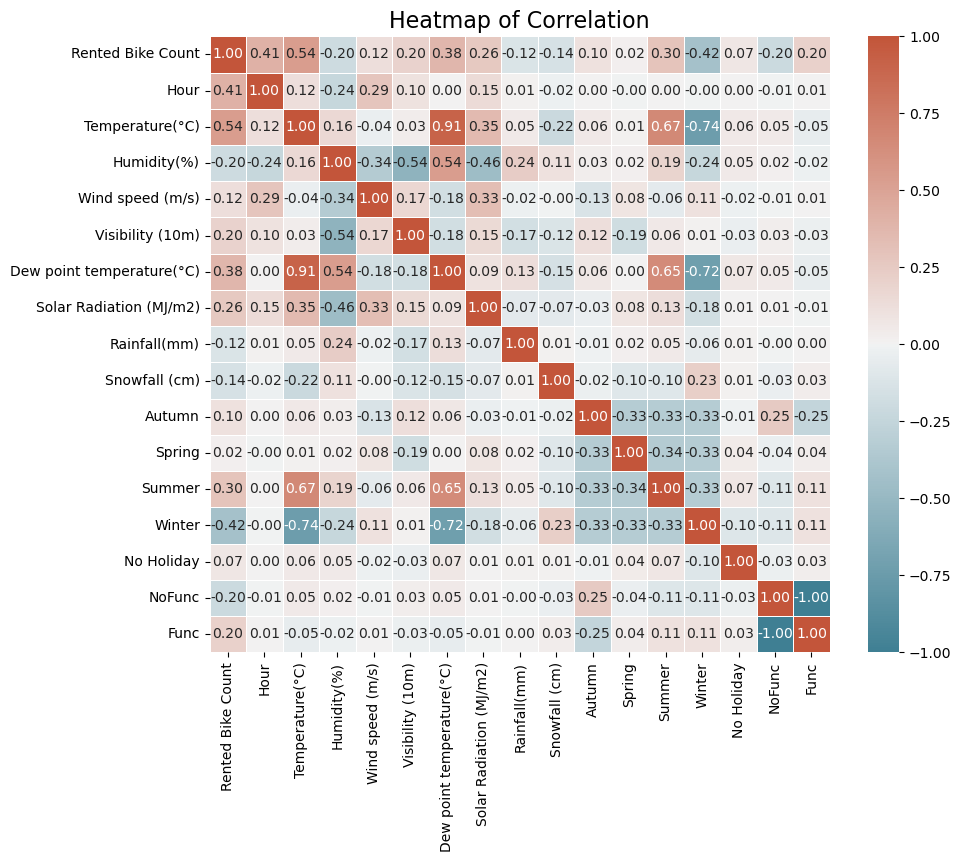

In [112]:
#Đánh giá correlation qua heatmap
corr = bike_sharing.select_dtypes(include = ['float', 'int']).corr()
cmap = sns.diverging_palette(220, 20, as_cmap = True)
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', center = 0, cmap = cmap, linewidths = 0.5, vmin = -1, vmax = 1)
plt.title('Heatmap of Correlation', fontsize=16)
plt.show()

Nhóm quyết định lọc từ heatmap ra những tương quan  >= 0.3 hoặc <= -0.3 để thể hiện các biến có tương quan khá chặt chẽ

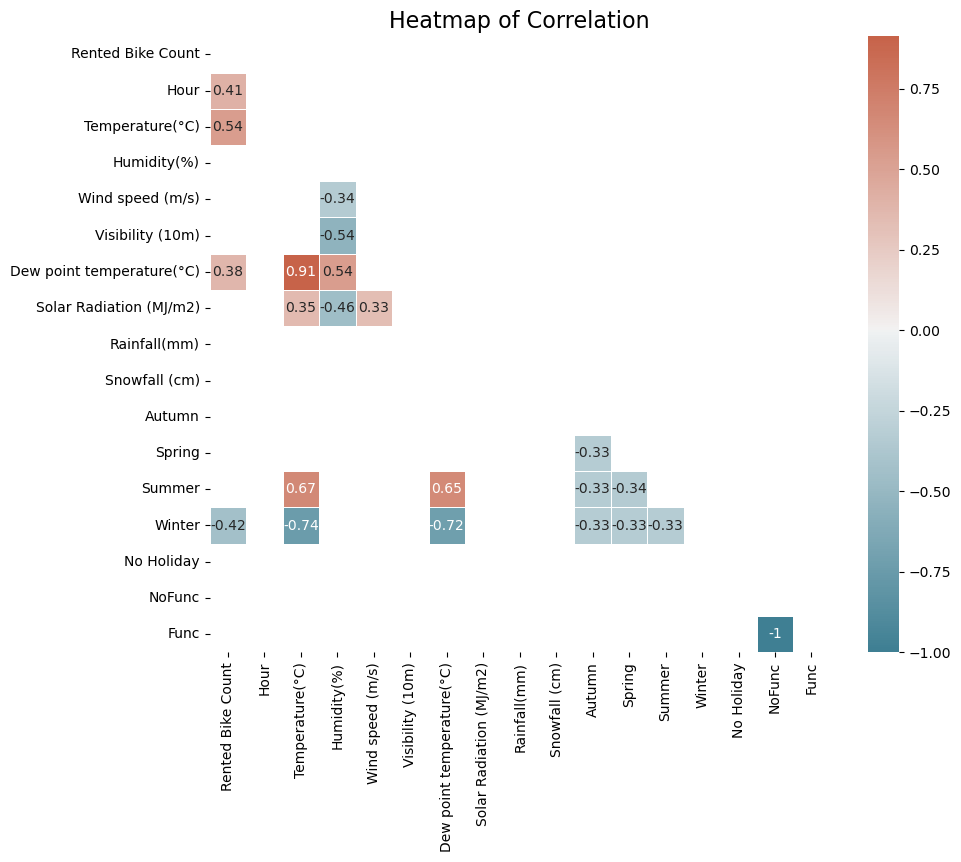

In [113]:
#heatmap đã được lọc ra các correlation >= 0.3 hoặc <= -0.3 để thể hiện các biến có tương quan chặt chẽ
corr = bike_sharing.select_dtypes(include = ['float', 'int']).corr()
cmap = sns.diverging_palette(220, 20, as_cmap = True)
plt.figure(figsize = (10, 8))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], mask=np.triu(corr), annot = True, center = 0, cmap = cmap, linewidths = 0.5)
plt.title('Heatmap of Correlation', fontsize = 16)
plt.show()

Hầu hết các biến có correlation nhỏ chứng tỏ các biến ít ảnh hưởng với nhau theo mối quan hệ tuyến tính. 
Ngoài ra, biến nhiệt độ có tương quan tuyến tính khá chặt chẽ tới số lượng xe đạp được thuê (0.54)


Text(0.5, 1.0, 'Rented Bike Count of Temperature')

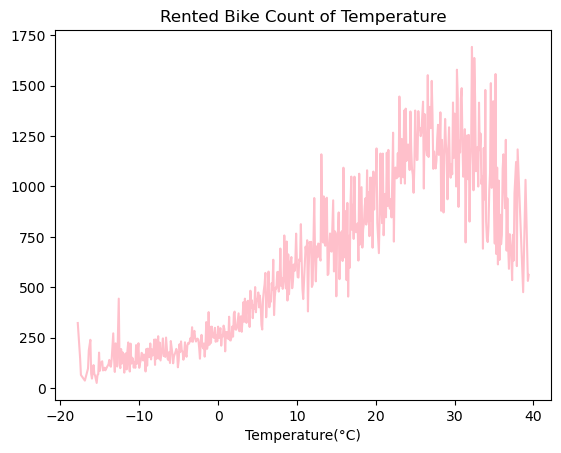

In [114]:
#Biến nhiệt độ và số lượng xe đạp được thuê có tương quan chặt chẽ
groupby_temperature = bike_sharing.copy()
groupby_temperature.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot.line(color = 'pink')
plt.title('Rented Bike Count of Temperature')

Có thể thấy khi nhiệt độ vào khoảng 20-30 độ thì lượng thuê xe đạp tăng cao nhất. Nhiệt độ càng ấm và càng dễ chịu thì nhu cầu thuê xe càng nhiều, tuy nhiên khi trời bắt đầu nóng thì nhu cầu thuê giảm. 

## **2.2. Descriptive Statistics**

In [115]:
#Mô tả các biến
bike_sharing.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.249315,0.252055,0.252055,0.246575,0.950685,0.033676,0.966324
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.432641,0.434217,0.434217,0.431042,0.216537,0.180404,0.180404


3 biến Solar Radiation, Rainfall, Snowfall có mean thấp, 25%, 50% gần như sấp xỉ không.
Điều này chứng tỏ rằng dữ liệu được lấy từ khu vực có thời tiết khá tốt: bức xạ mặt trời (không nắng gắt), mưa và tuyết bằng 0 hoặc xấp xỉ bằng không (mức độ nhẹ).
Nhiệt độ trung bình khoảng 13 độ C có thể dữ liệu được lấy từ vùng có khí hậu ôn hòa


Để tìm hiểu rõ hơn về điều này chúng ta cần tìm hiểu về số lượng từng biến

In [116]:
#Số lượng từng biến
bike_sharing['Snowfall (cm)'].value_counts().head(10).to_frame()

,count
Snowfall (cm),
0.0,8317
0.3,42
1.0,39
0.9,34
0.5,34
0.7,31
0.8,22
2.0,22
0.4,21


In [117]:
bike_sharing[['Solar Radiation (MJ/m2)']].value_counts().to_frame()

,count
Solar Radiation (MJ/m2),
0.00,4300
0.01,128
0.02,82
0.03,69
0.06,61
...,...
3.38,1
2.97,1
3.44,1


In [118]:
bike_sharing[[ 'Rainfall(mm)']].value_counts().to_frame()

,count
Rainfall(mm),
0.0,8232
0.5,116
1.0,66
1.5,56
0.1,46
...,...
2.4,1
1.3,1
1.9,1


Có thể thấy rằng rõ ràng rằng hơn 90% dữ liệu là không mưa, không có tuyết rơi và 50% dữ liệu là trời không nắng, nếu có nắng thì lượng bức xạ cũng ở mức độ nhẹ. Chứng tỏ rõ ràng rằng thời thiết ở khu vực này dễ chịu và ít có thời tiết xấu bất thường xảy ra

Nhóm sử dụng biểu đồ cột kết hợp line để biểu thị phân bổ số lượng của từng biến. Qua đó có được một góc nhìn tổng quan về từng biến trong bộ dữ liệu


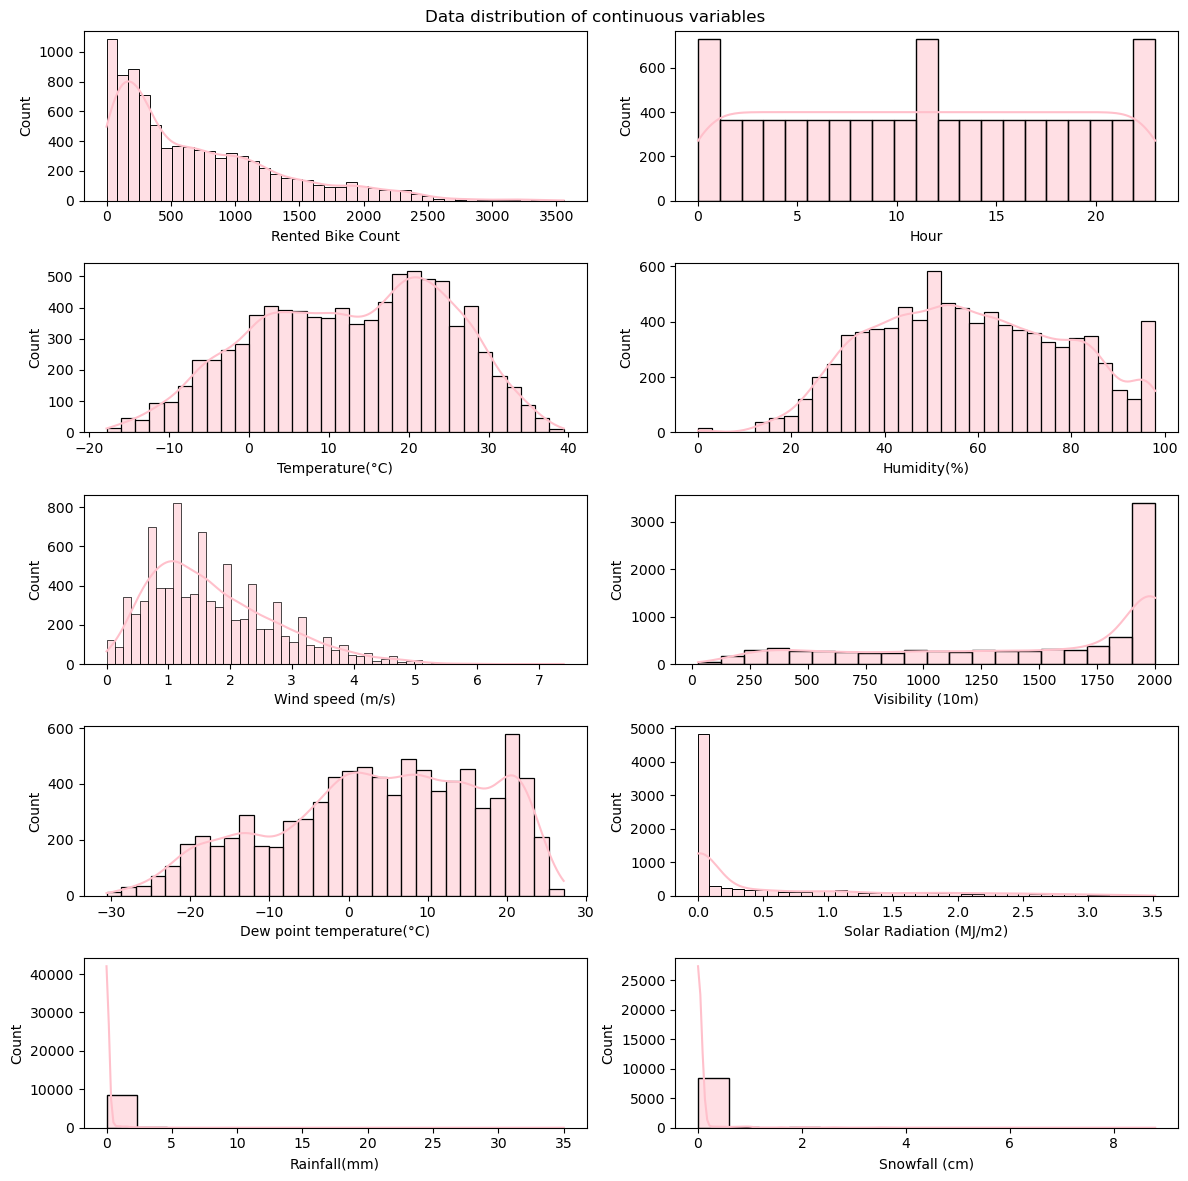

In [119]:
#Biểu đồ cột kết hợp với line để biểu thị phân bổ số lượng từng biến
plt.figure(figsize = (12, 12))
for i, col in enumerate(bike_sharing.select_dtypes(include = ['float64','int64']).columns):
    if i >= 5*2:
        break
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data = bike_sharing, x = col, ax = ax,color = 'pink',kde = True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Tổng quan dữ liệu thấy được rằng nhiệt độ của khu vực thu nhập dữ liệu vào 20 độ C, độ ẩm trung bình khoảng 40-80%, tốc độ gió trung bình khoảng 1m/s. Solar Radiation rất thấp thấy được rằng khu vực này không có nhiều ngày nắng mạnh Rainfall, Snowfall gần như bằng 0 chứng tỏ rằng thời tiết khu vực này khá tốt, rất ít khi gặp thời tiết xấu như mưa, tuyết.

Tiếp theo, nhóm sử dụng biểu đồ dạng cột theo biến thời gian để thấy được sự phụ thuộc của từng biến theo thời gian

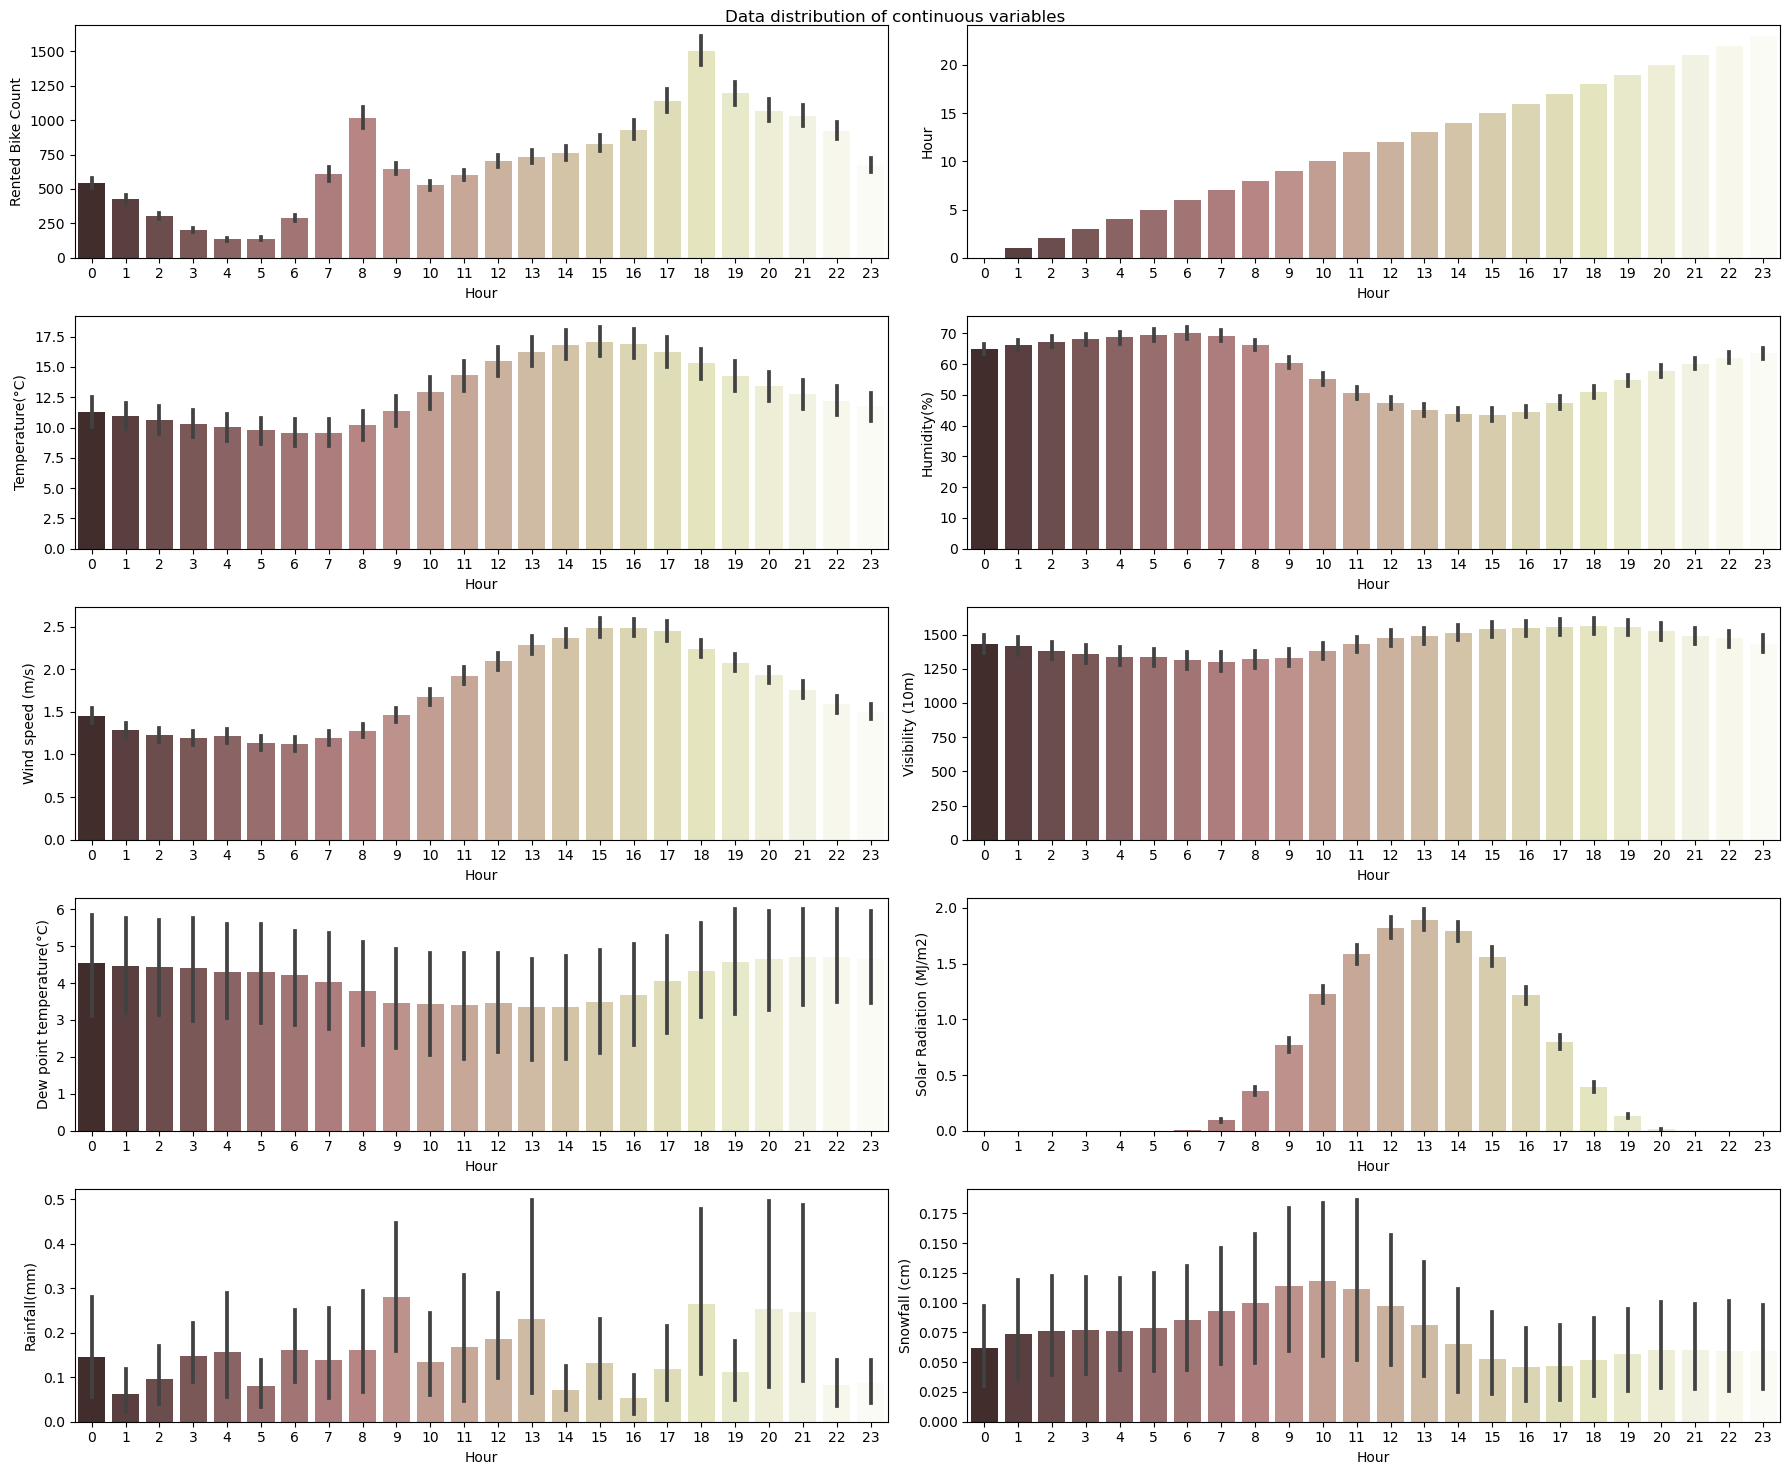

In [120]:
#Biểu đồ theo thời gian từng biến để thể hiện sự phụ thuộc của từng biến theo thời gian
plt.figure(figsize = (18, 15))
for i, col in enumerate(df.select_dtypes(include = ['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.barplot(data = df,x = 'Hour', y = col, ax = ax, palette = 'pink')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

Lượng thuê xe cao điểm vào 18h, đây cũng là lúc sau thời điểm nhiệt độ cao nhất trong ngày, lúc này nhiệt độ đã giảm và trời đã hết nắng gắt (Solar Radiation thấp) nên có thể dự đoán rằng đây là lúc thời tiết mát mẻ và dễ chịu nên số lượng thuê xe cao nhất trong ngày.


In [121]:
season_var = pd.crosstab(index = df['Seasons'],columns = '% observations')
season_var

col_0,% observations
Seasons,
Autumn,2184
Spring,2208
Summer,2208
Winter,2160


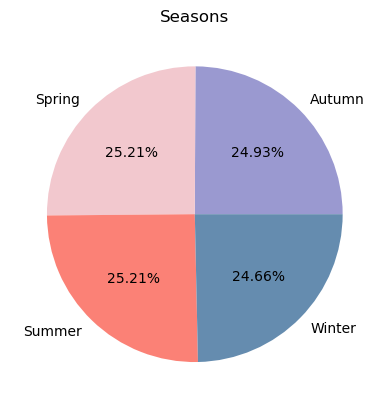

In [122]:
#Pie chart của Season
a = ['#9A99D0','#F2C8CE','#FB8176','#658CAF']
plt.pie(season_var['% observations'],labels = season_var['% observations'].index,autopct = '%.2f%%', colors = a)
plt.title('Seasons')
plt.show()

Số lượng dữ liệu các mùa đều nhau chứng tỏ dữ liệu được thu thập đủ qua 4 mùa


Text(0.5, 1.0, 'Rented Bike Count in Seasons')

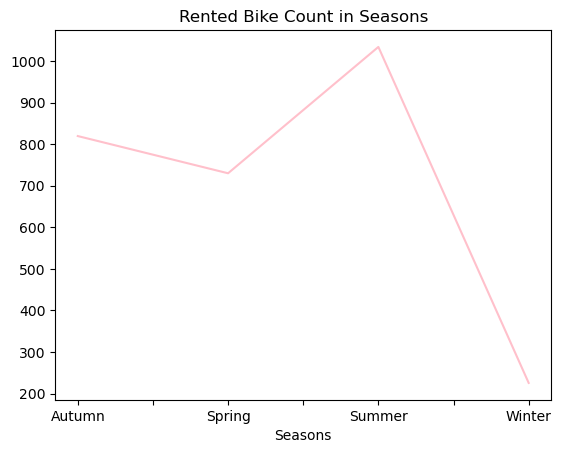

In [123]:
groupby_seasons = df.copy()
result = groupby_seasons.groupby('Seasons').agg({'Rented Bike Count': 'mean'})
result['Rented Bike Count'].plot.line(color = 'pink')
plt.title('Rented Bike Count in Seasons')

Lượng xe đạp được thuê tăng cao vào mùa hạ và giảm vào mùa đông. 

In [124]:
df['Functioning Day'].value_counts().to_frame()

,count
Functioning Day,
Yes,8465
No,295


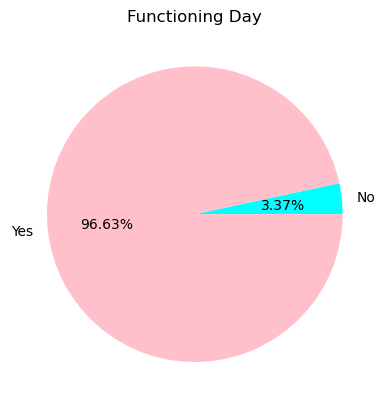

In [125]:
#Pie chart của Functioning Day
Functioning_Day_var = pd.crosstab(index = df['Functioning Day'],columns = '% observations')
plt.pie(Functioning_Day_var['% observations'],labels = Functioning_Day_var['% observations'].index,autopct = '%.2f%%', colors = ['cyan','pink'])
plt.title('Functioning Day')
plt.show()

In [126]:
df['Holiday'].value_counts().to_frame()

,count
Holiday,
No Holiday,8328
Holiday,432


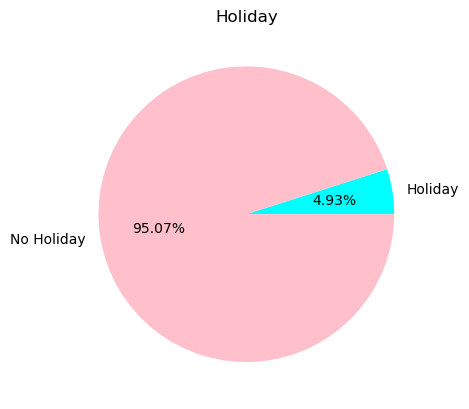

In [127]:
#Pie chart của Holiday
holiday_var = pd.crosstab(index = df['Holiday'],columns = '% observations')
plt.pie(holiday_var['% observations'],labels = holiday_var['% observations'].index,autopct ='%.2f%%',colors = ['cyan','pink'])
plt.title('Holiday')
plt.show()

In [128]:
groupby_holiday = df.copy()
holiday1 = pd.DataFrame(groupby_holiday.groupby('Holiday')['Rented Bike Count'].mean().sort_values(ascending = False))
holiday1.style.background_gradient(cmap = sns.light_palette('pink',as_cmap = True))

,Rented Bike Count
Holiday,
No Holiday,715.228026
Holiday,499.756944


Text(0.5, 1.0, 'Rented Bike Count in Holiday')

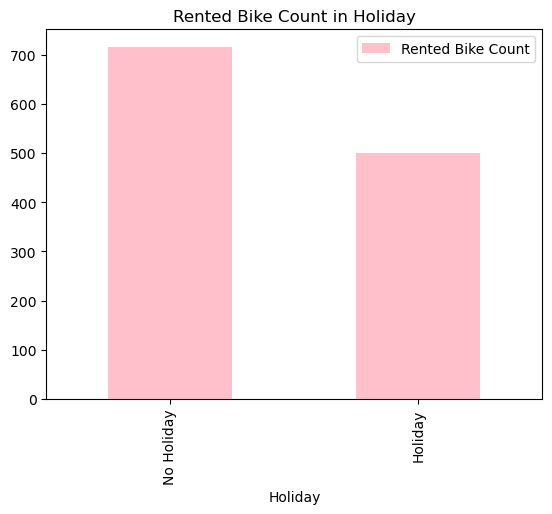

In [129]:
holiday1.plot.bar(color = ['pink'])
plt.title('Rented Bike Count in Holiday')

Từ 3 đồ thị trên, ta thấy được rầng: Lượng thuê xe ngày thường cao hơn ngày nghỉ lễ 

## **2.3. Reduce Outliers**

Ở phần tiếp theo nhóm sử dụng boxplot để biểu thị từng biến và xác định outlier để có cách xử lý phù hợp ở các bước tiếp theo

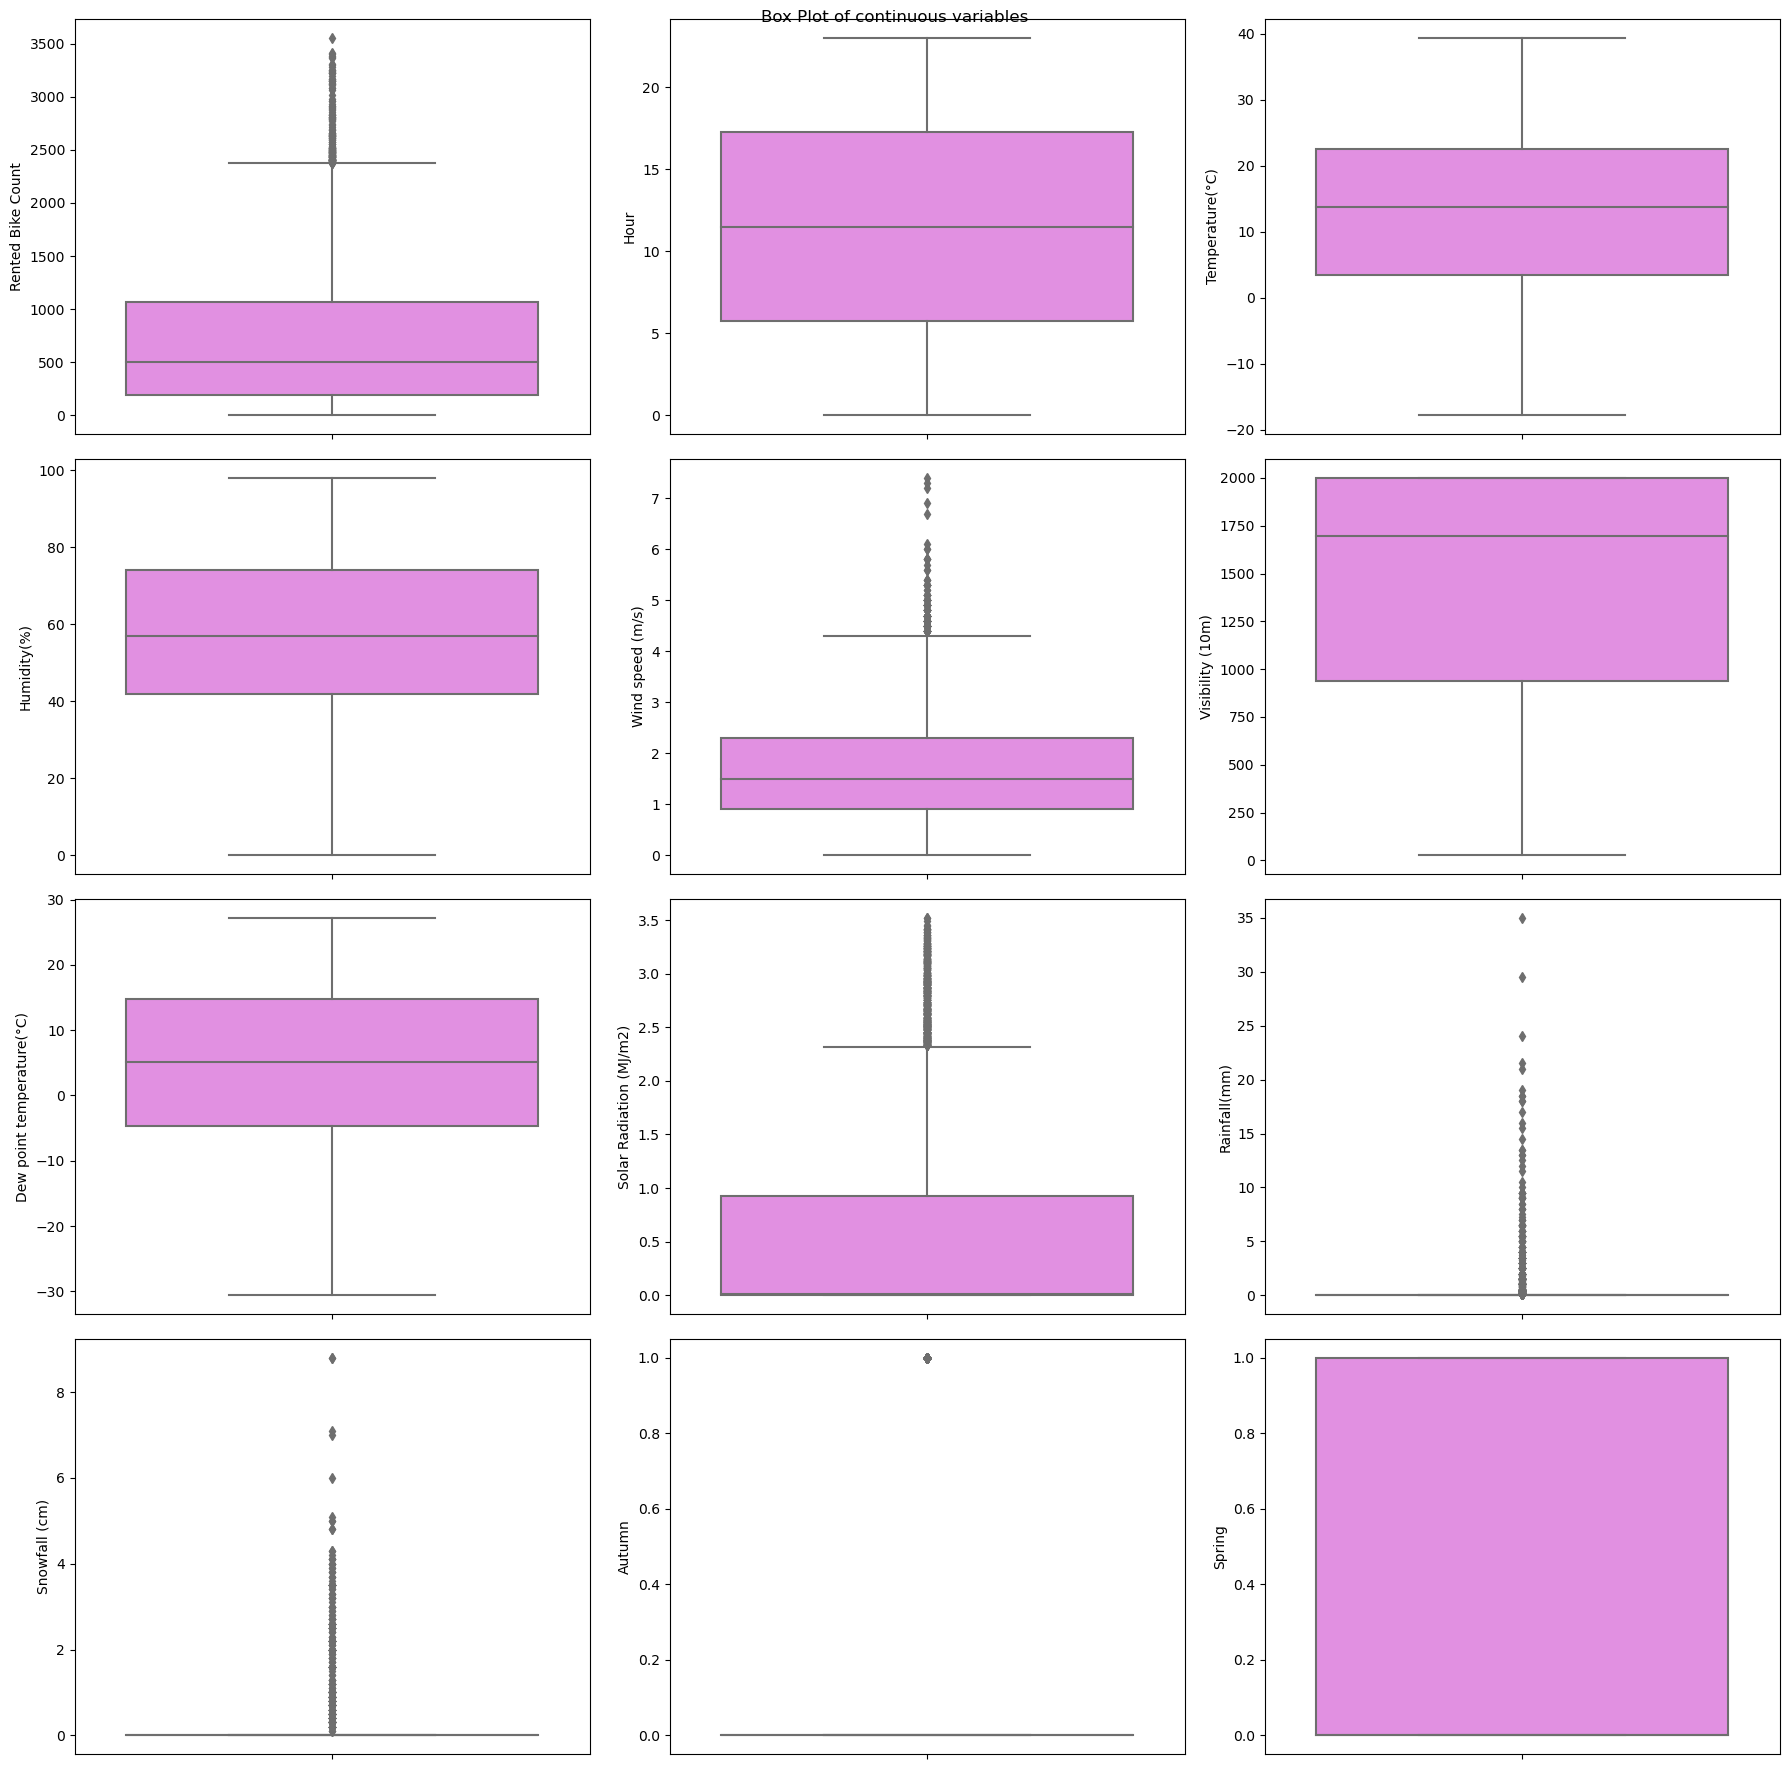

In [130]:
#Box plot để biểu thị từng biến và xác định outliers
plt.figure(figsize = (18, 18))
for i, col in enumerate(bike_sharing.select_dtypes(include = ['float64','int64']).columns):
    if i >= 4*3:
        break
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = bike_sharing, y = col, ax = ax,color = 'violet')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()
plt.show()

Định nghĩa hàm remove_outliers để loại bỏ các outlier

In [131]:
#Hàm để loại bỏ outliers
def remove_outliers(df: pd.DataFrame, feat: str):
    """
    """
    feat_fraud = df[feat].values
    q25, q75 = np.percentile(feat_fraud, 25), np.percentile(feat_fraud, 75)
    iqr = q75 -q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in feat_fraud if x < lower or x > upper]
    print(f'Feature {feat} Outliers for Fraud Cases: {len(outliers)}')

    return df.drop(df[(bike_sharing[feat] > upper) | (df[feat] < lower)].index)

In [132]:
for i in bike_sharing.select_dtypes(include = ['float64','int64']).columns:
  bike_sharing = remove_outliers(bike_sharing,i)

Feature Rented Bike Count Outliers for Fraud Cases: 158
Feature Hour Outliers for Fraud Cases: 0
Feature Temperature(°C) Outliers for Fraud Cases: 0
Feature Humidity(%) Outliers for Fraud Cases: 0
Feature Wind speed (m/s) Outliers for Fraud Cases: 161
Feature Visibility (10m) Outliers for Fraud Cases: 0
Feature Dew point temperature(°C) Outliers for Fraud Cases: 0
Feature Solar Radiation (MJ/m2) Outliers for Fraud Cases: 681
Feature Rainfall(mm) Outliers for Fraud Cases: 512
Feature Snowfall (cm) Outliers for Fraud Cases: 398
Feature Autumn Outliers for Fraud Cases: 0
Feature Spring Outliers for Fraud Cases: 1676
Feature Summer Outliers for Fraud Cases: 0
Feature Winter Outliers for Fraud Cases: 0
Feature No Holiday Outliers for Fraud Cases: 293
Feature NoFunc Outliers for Fraud Cases: 200
Feature Func Outliers for Fraud Cases: 0


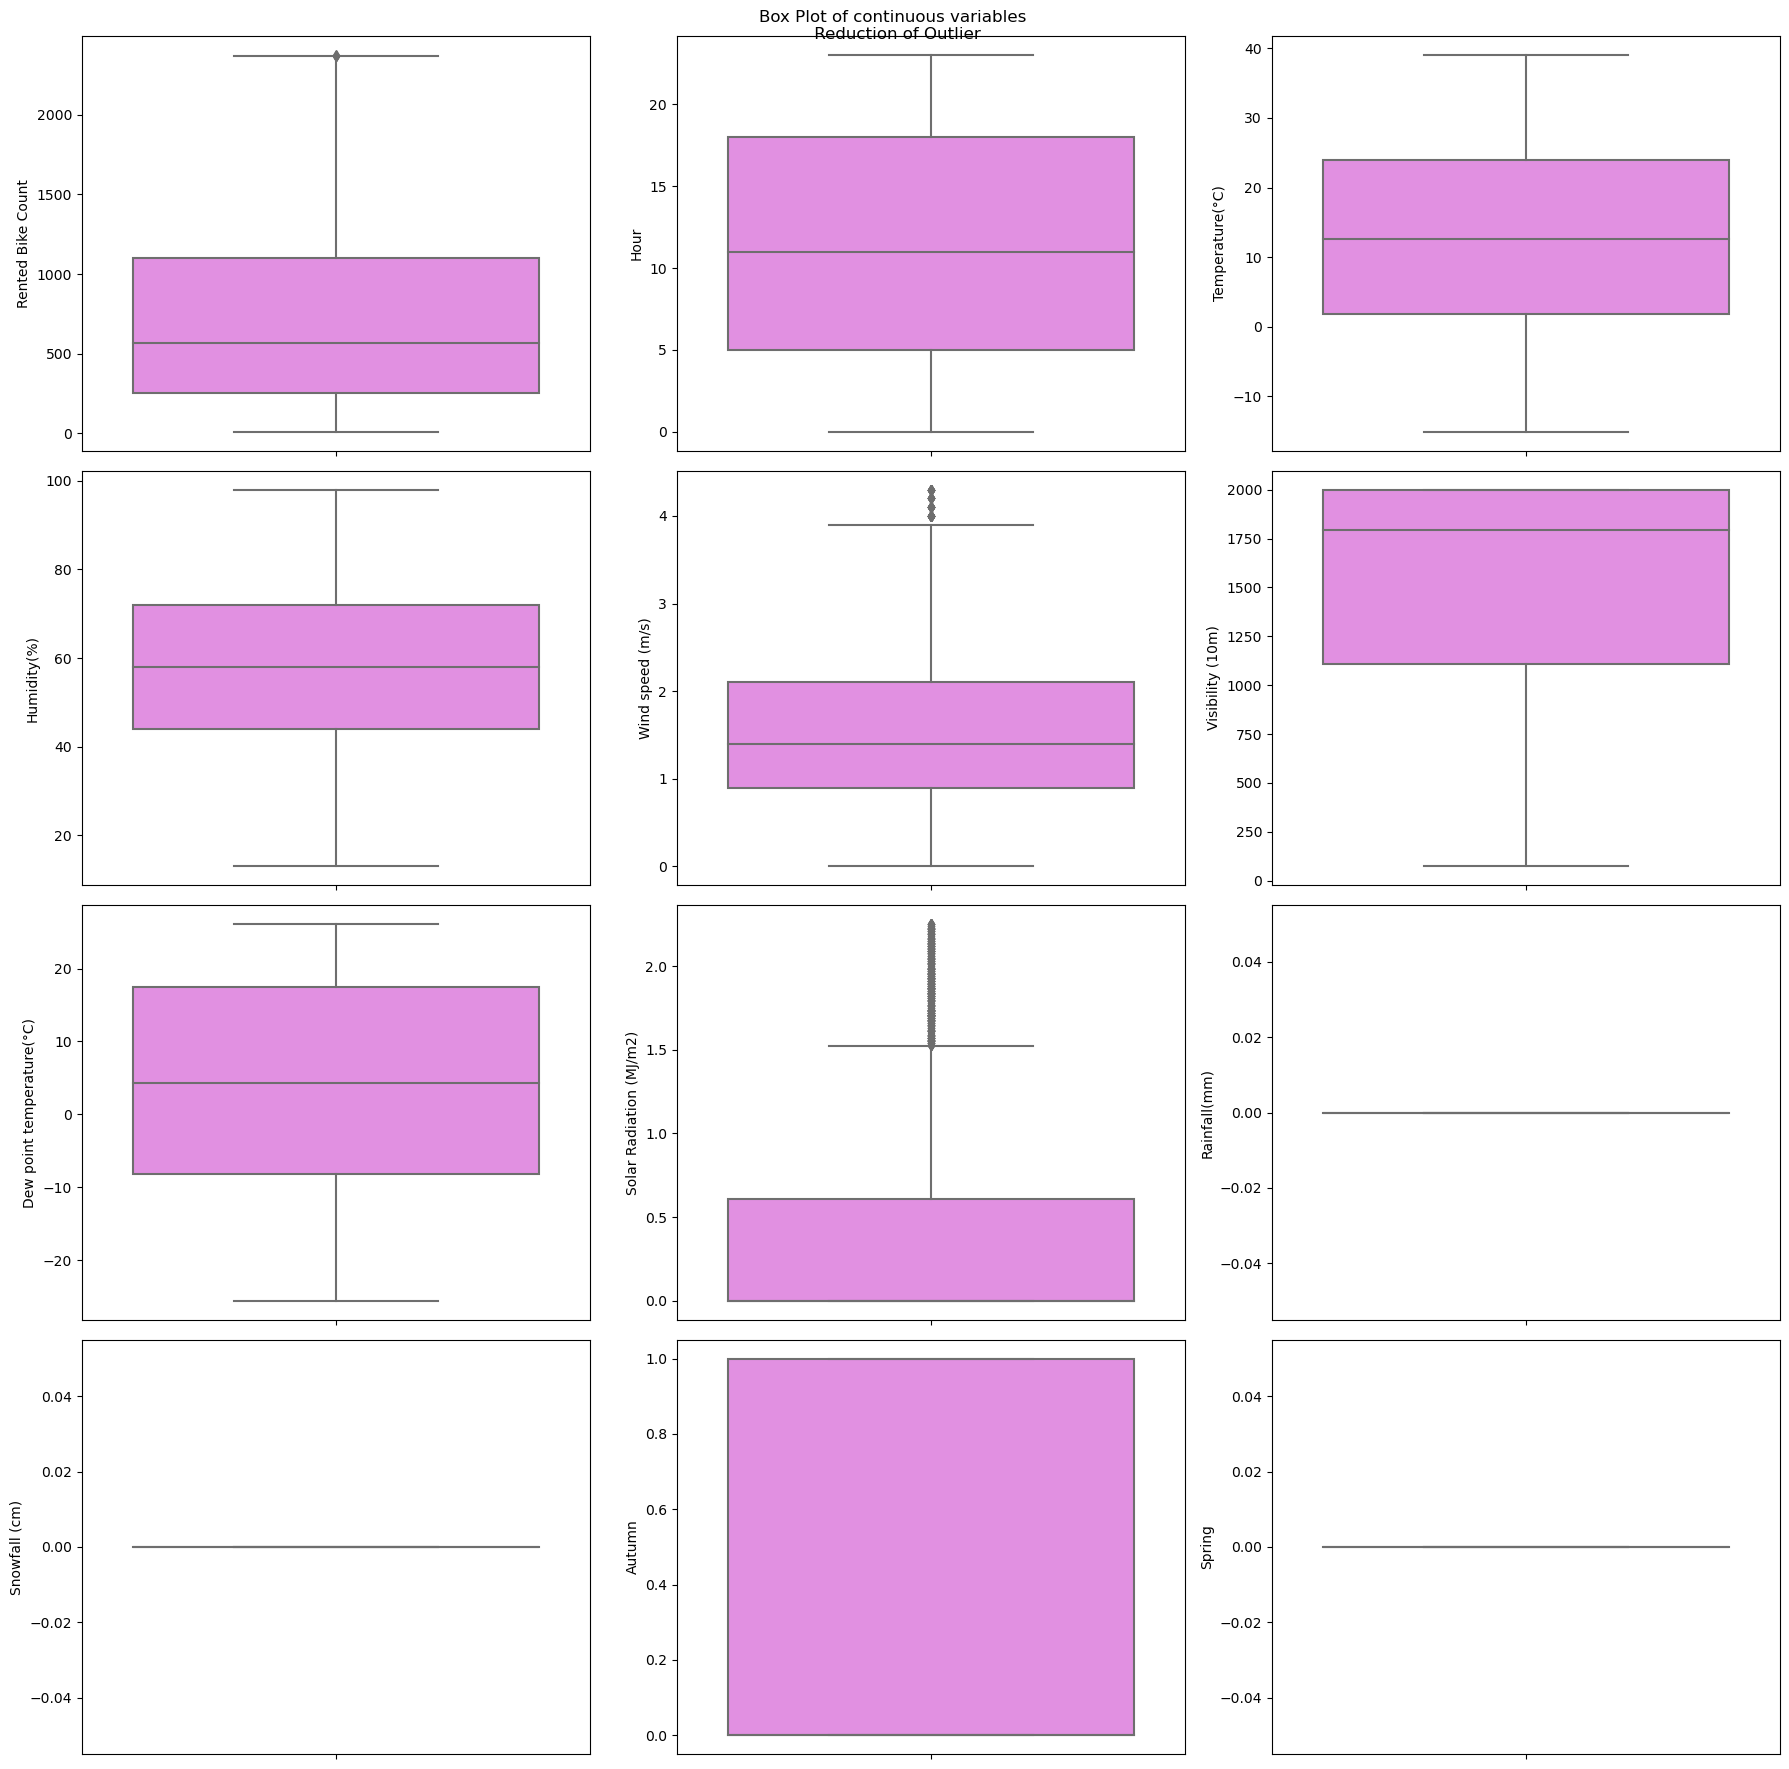

In [133]:
#Box plot của các biến sau khi đã loại outliers
plt.figure(figsize = (18, 18))
for i, col in enumerate(bike_sharing.select_dtypes(include = ['float64','int64']).columns):
    if i >= 4*3:
        break
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data = bike_sharing, y = col, ax = ax,color = 'violet')
plt.suptitle('Box Plot of continuous variables \n Reduction of Outlier')
plt.tight_layout()
plt.show()

## **2.4: Identify important variable**

In [134]:
bike_sharing.shape[1]

18

In [135]:
#Sử dụng The Pearson Correlation Coefficient và P-value để xác định biến quan trọng 
for i in range(2,18):
    pearson_coef, p_value = stats.pearsonr(bike_sharing[bike_sharing.columns[i]], bike_sharing['Rented Bike Count'])
    print(f"The Pearson Correlation Coefficient - {bike_sharing.columns[i]} is", pearson_coef, " with a P-value of P =", p_value,
          '\n', '---------')

The Pearson Correlation Coefficient - Hour is 0.4345175874636249  with a P-value of P = 6.703851688104181e-215 
 ---------
The Pearson Correlation Coefficient - Temperature(°C) is 0.5983011182609015  with a P-value of P = 0.0 
 ---------
The Pearson Correlation Coefficient - Humidity(%) is 0.01278416866703341  with a P-value of P = 0.3818638401443978 
 ---------
The Pearson Correlation Coefficient - Wind speed (m/s) is 0.09081938004466679  with a P-value of P = 4.819463596160243e-10 
 ---------
The Pearson Correlation Coefficient - Visibility (10m) is 0.14881648517054927  with a P-value of P = 1.3673736238032848e-24 
 ---------
The Pearson Correlation Coefficient - Dew point temperature(°C) is 0.5040031330745236  with a P-value of P = 4.078765291786647e-300 
 ---------
The Pearson Correlation Coefficient - Solar Radiation (MJ/m2) is 0.2110171056351061  with a P-value of P = 2.8856899967310045e-48 
 ---------
The Pearson Correlation Coefficient - Rainfall(mm) is nan  with a P-value of P

# <span style="color: #ec008a; font-family: EB Garamond"> Part 3: Model Development

Nhóm sử dụng tập train1 và test ban đầu với tỷ lệ 20% cho test ban đầu để chuẩn hóa dữ liệu. Sau đó đối với mô hình, nhóm tiến hành chia 80% dữ liệu đã được chuẩn hóa (train1) thành tập train và validation với tỷ lệ 25% cho validation.

Vậy tỷ lệ dữ liệu sử dụng là như sau:

-Chuẩn hóa dữ liệu: train1: 0.8 và test: 0.2

-Huấn luyện và đánh giá mô hình trên tập train1: train: 0.8 * 0.75 = 0.6 và validation: 0.8 * 0.25 = 0.2

## **3.1. Data Split**

In [136]:
#Lấy ra dữ liệu numeric
X = bike_sharing.iloc[:,2:11]
y = bike_sharing.iloc[:,1]

#Chia dữ liệu thành tập train và test ban đầu
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [137]:
#Join các cột biến X numeric vào các cột biến X đã sử dụng Dummy ở phần formatting
X_train2 = X_train1.join(bike_sharing.iloc[:,11:18])
X_train2

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
8053,13,13.6,32,1.8,1814,-2.8,2.22,0.0,0.0,1,0,0,0,1,0,1
2107,19,5.5,30,2.7,1150,-10.7,0.01,0.0,0.0,0,0,0,1,1,0,1
1912,16,5.1,16,1.8,1998,-18.7,1.17,0.0,0.0,0,0,0,1,1,0,1
7801,1,10.7,57,0.9,1828,2.5,0.00,0.0,0.0,1,0,0,0,1,0,1
8360,8,5.0,77,1.5,1115,1.2,0.07,0.0,0.0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,4,2.5,49,0.4,1988,-7.1,0.00,0.0,0.0,1,0,0,0,1,0,1
698,2,-0.9,84,0.6,230,-3.2,0.00,0.0,0.0,0,0,0,1,1,0,1
6540,12,27.0,74,2.5,915,21.9,0.94,0.0,0.0,0,0,1,0,1,0,1
7677,21,14.3,72,1.0,1374,9.3,0.00,0.0,0.0,1,0,0,0,1,0,1


In [138]:
X_test1 = X_test.join(bike_sharing.iloc[:,11:18])
X_test1

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Autumn,Spring,Summer,Winter,No Holiday,NoFunc,Func
5588,20,31.5,53,1.8,2000,20.7,0.08,0.0,0.0,0,0,1,0,1,0,1
33,9,-2.9,68,1.6,1487,-7.9,0.30,0.0,0.0,0,0,0,1,1,0,1
7525,13,14.3,43,3.6,1995,1.8,1.86,0.0,0.0,1,0,0,0,1,0,1
8077,13,16.5,37,1.2,1400,1.7,2.12,0.0,0.0,1,0,0,0,1,0,1
2011,19,3.5,60,2.7,936,-3.5,0.00,0.0,0.0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,21,9.6,52,1.3,906,0.2,0.00,0.0,0.0,1,0,0,0,1,0,1
1898,2,-4.7,33,0.1,2000,-18.5,0.00,0.0,0.0,0,0,0,1,1,0,1
1761,9,-8.4,28,2.2,1947,-23.7,0.49,0.0,0.0,0,0,0,1,1,0,1
4903,7,21.3,44,0.5,1911,8.5,0.20,0.0,0.0,0,0,1,0,1,0,1


In [139]:
# Chia tập train1 thành tập train và validation
X_train, X_val, y_train, y_val = train_test_split(X_train2, y_train1, test_size = 0.25, random_state = 42)

In [140]:
model_comparison = {}

## **3.2. Linear Regression**

In [141]:
# Khởi tạo mô hình
model = LinearRegression()

# Fit mô hình 
model.fit(X_train,y_train)

y_pred = model.predict(X_val)
print(f"Model R-Square : {r2_score(y_val,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_val,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_val,y_pred),mean_squared_error(y_val,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 59.26%
Model MSE : 14660450.05%
Cross Val Accuracy: 56.84 %
Cross Val Standard Deviation: 1.87 %


In [142]:
# Summary
import statsmodels.api as sm
lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     416.8
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:23:48   Log-Likelihood:                -20809.
No. Observations:                2808   AIC:                         4.164e+04
Df Residuals:                    2798   BIC:                         4.170e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Hour                         31.8022      1.162     27.369      0.000      29.524      34.081
Temperature(°C)             -17.8552      8.774     -2.035      0.042     -35.059      -0.651
Humidity(%)                 -14.1389      2.560     -5.524      0.000     -19.158      -9.120
Wind speed (m/s)             17.8508      9.307      1.918      0.055      -0.399      36.101
Visibility (10m)             -0.0023      0.017     -0.134      0.893      -0.035       0.031
Dew point temperature(°C)    37.1737      9.327      3.985      0.000      18.885      55.463
Solar Radiation (MJ/m2)     -24.7759     16.117     -1.537      0.124     -56.379       6.827
Rainfall(mm)                3.57e-14    1.3e-14      2.756      0.006    1.03e-14    6.11e-14
Snowfall (cm)              2.063e-13   3.32e-14      6.212      0.000    1.41e-13    2.71e-13
Autumn                      361.4974     35.627     10.147      0.000     291.639     431.355
Spring                             0          0        nan        nan           0           0
Summer                      315.3750     40.236      7.838      0.000     236.479     394.271
Winter                     -132.6162     38.795     -3.418      0.001    -208.685     -56.547
No Holiday                  544.2562     97.466      5.584      0.000     353.143     735.369
NoFunc                             0          0        nan        nan           0           0
Func                        544.2562     97.466      5.584      0.000     353.143     735.369
==============================================================================
Omnibus:                      259.742   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.696
Skew:                           0.754   Prob(JB):                     2.59e-77
Kurtosis:                       3.859   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [152]:
# Assumptions
residuals = lin_reg.resid
fitted_value = lin_reg.fittedvalues
np.mean(residuals)

-9.107902782711802e-13

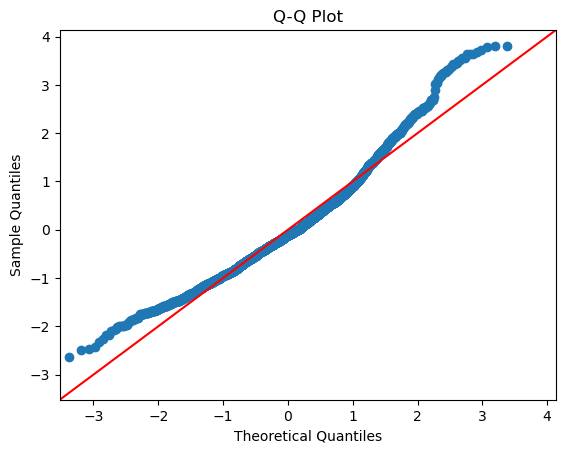

In [156]:
# Normality of the residuals 
sm.qqplot(residuals, fit = True, line = '45')
plt.title('Q-Q Plot')
plt.show()

Các điểm trên đồ thị gần với đường chéo, đặc biệt là ở giữa, thì có thể kết luận rằng residuals có thể được coi là tuân theo phân phối chuẩn

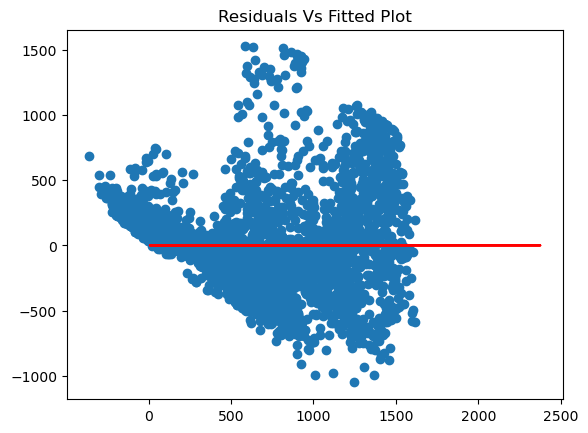

In [145]:
# Homoscedasticity
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c = 'r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

Mô hình có hiệp phương sai không đồng nhất do các điểm phân tán không đều xung quanh đường ngang màu đỏ

## **3.3. Polynomial Regression**

In [146]:
# Khởi tạo mô hình
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train, y_train)
X_val_poly = poly_features.transform(X_val)

# Fit mô hình 
model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

y_pred = model2.predict(X_val_poly)
print(f"Model R-Square : {r2_score(y_val,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_val,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model2, X = X_train_poly, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression'] = [r2_score(y_val, y_pred), mean_squared_error(y_val, y_pred),(accuracies.mean()), (accuracies.std())]

Model R-Square : 69.48%
Model MSE : 10982216.75%
Cross Val Accuracy: 67.27 %
Cross Val Standard Deviation: 1.98 %


## **3.4. Random Forest Regression**

In [147]:
# Khởi tạo mô hình
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

# Fit mô hình
model = RandomForestRegressor(n_estimators = 10,random_state = 0)
model.fit(X_train,y_train)

y_pred=model.predict(X_val)
print(f"Model R-Square : {r2_score(y_val,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_val,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random Forest Regression'] = [r2_score(y_val, y_pred), mean_squared_error(y_val, y_pred), (accuracies.mean()), (accuracies.std())]

Model R-Square : 86.05%
Model MSE : 5020015.51%
Cross Val Accuracy: 84.29 %
Cross Val Standard Deviation: 2.17 %


## **3.5. Decision Tree Regression**

In [148]:
# Khởi tạo mô hình
model = DecisionTreeRegressor()
# Fit mô hình
model.fit(X_train,y_train)

y_pred = model.predict(X_val)
print(f"Model R-Square : {r2_score(y_val,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_val,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression'] = [r2_score(y_val, y_pred), mean_squared_error(y_val, y_pred),(accuracies.mean()), (accuracies.std())]

Model R-Square : 78.71%
Model MSE : 7660688.46%
Cross Val Accuracy: 72.74 %
Cross Val Standard Deviation: 3.98 %


# <span style="color: #ec008a; font-family: EB Garamond"> Part 4: Model Comparison

In [149]:
Model_com_df = pd.DataFrame(model_comparison).T
Model_com_df.columns = ['R-Square','MSE','CV Accuracy','CV std']
Model_com_df = Model_com_df.sort_values(by = 'R-Square',ascending = False)
Model_com_df

,R-Square,MSE,CV Accuracy,CV std
Random Forest Regression,0.860511,50200.155053,0.842939,0.021745
Decision Tree Regression,0.787136,76606.884615,0.727380,0.039789
Polynomial Regression,0.694843,109822.167470,0.672675,0.019815
Linear Regression,0.592637,146604.500531,0.568401,0.018669


Dựa trên kết quả này, nhóm quyết định lựa chọn mô hình Random Forest Regression vì có R-Square cao nhất, MSE thấp nhất, CV Accuracy cao nhất và CV std thấp nhất. Từ đây, nhóm tiến hành chạy mô hình trên tập train và validation.

In [150]:
rfr.fit(X_train2, y_train1)
y_predtest = rfr.predict(X_test1)

print(f"Model R-Square : {r2_score(y_test, y_predtest)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_predtest)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train2, y = y_train1, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 85.30%
Model MSE : 5025917.14%
Cross Val Accuracy: 74.64 %
Cross Val Standard Deviation: 3.61 %


# <span style="color: #ec008a; font-family: EB Garamond"> Part 5: Conclusion

Kết luận lại, nhóm đã phát triển mô hình Random Forest Regression để dự đoán Rented Bike Count

Để tối ưu hóa hiệu suất, có thể sử dụng kỹ thuật tinh chỉnh siêu tham số như RandomizedSearchCV để tìm các tham số phù hợp nhất cho dữ liệu cụ thể.
Lưu ý rằng việc hiểu rõ về dữ liệu và mối quan hệ giữa các biến sẽ giúp tận dụng tối đa sức mạnh của Random Forest
